In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('Titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_mean         0
dtype: int64

Mean Imputation if we have a Normally Distributed Datasets

<Axes: xlabel='age', ylabel='Count'>

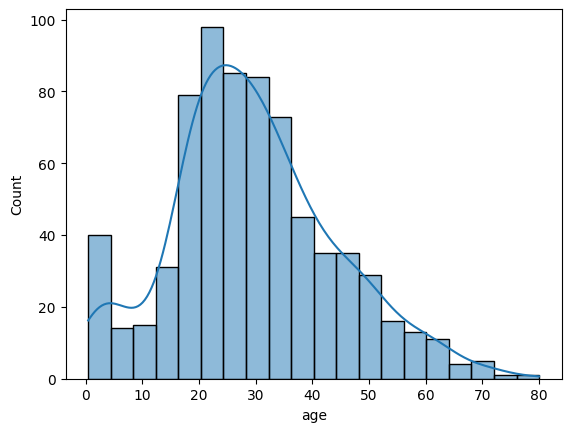

In [13]:
sns.histplot(df['age'],kde=True)

In [7]:
df['Age_mean']= df['age'].fillna(df['age'].mean())

In [9]:
df.shape

(891, 16)

In [11]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


Median Imputation - If we have a left or right skewed dataset. ie, with outliers.

In [14]:
df['Age_Median'] = df['age'].fillna(df['age'].median())

In [16]:
df[['Age_Median','Age_mean','age']]

,Age_Median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


Mode Imputation - If we hve a categorical column we use mode imputation

In [18]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_Median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [19]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df[df['embarked'].notna()]['embarked'].mode()[0]

'S'

In [26]:
df['embarked_mode']= df['embarked'].fillna(df['embarked'].mode())

In [28]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [31]:
df['embarked_mode'].isnull().sum()

np.int64(2)

5 Number Summary and Box Plot

In [51]:
lst = [23,45,78,98,22,45,76,84,78,21,11,4,67,100]
minimum,q1,median,q3,maximum = np.quantile(lst,[0,0.25,0.50,0.75,1])

In [52]:
minimum,q1,median,q3,maximum

(np.float64(4.0),
 np.float64(22.25),
 np.float64(56.0),
 np.float64(78.0),
 np.float64(100.0))

In [53]:
iqr = q3-q1
iqr

np.float64(55.75)

In [ ]:
lower_fence = q1-1.5*(iqr)
higgher_fence = q3+1.5*(iqr)

In [55]:
lower_fence,higgher_fence

(np.float64(-61.375), np.float64(161.625))

<Axes: >

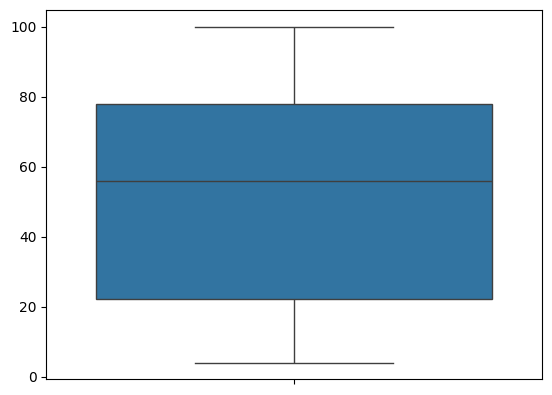

In [56]:
sns.boxplot(lst)

<Axes: >

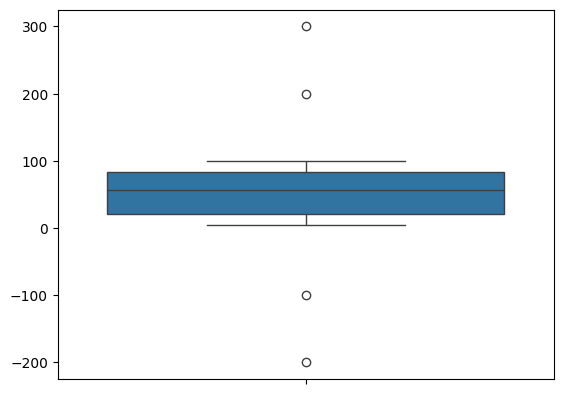

In [61]:
lst1 = [-100,-200,23,45,78,98,22,45,76,84,78,21,11,4,67,100,200,300]
sns.boxplot(lst1)


Data Encoding - is like converting categorical column into a meaningfull numerical column
Nominal/One Hot Encoding
Red=[1,0,0]
Green=[0,1,0]
Blue=[0,0,1]


In [65]:
!pip install scikit-learn

^C


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.7 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 4.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.9/8.7 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------------

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
df1= pd.DataFrame({
    'color': ['Red','Green','Blue','Blue','Red','Green']
    
})

In [70]:
df1

,color
0,Red
1,Green
2,Blue
3,Blue
4,Red
5,Green


In [77]:
encoder = OneHotEncoder()
encoded= encoder.fit_transform(df1[['color']]).toarray()

In [81]:
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
df_encoded

,color_Blue,color_Green,color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0


In [82]:
pd.concat([df1,df_encoded],axis=1)

,color,color_Blue,color_Green,color_Red
0,Red,0.0,0.0,1.0
1,Green,0.0,1.0,0.0
2,Blue,1.0,0.0,0.0
3,Blue,1.0,0.0,0.0
4,Red,0.0,0.0,1.0
5,Green,0.0,1.0,0.0
